In [1]:
#tutorial example

In [2]:
from sgw import sgw
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import networkx as nx
import random
from scipy.spatial.distance import cdist

In [3]:
#data

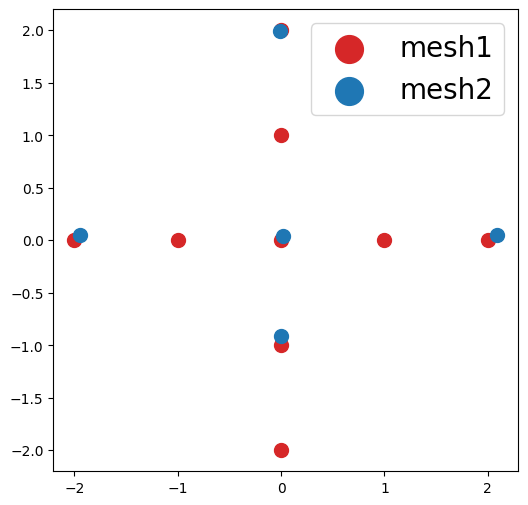

In [4]:
random_state=1321412
np.random.seed(random_state)
# Create a mesh of points
mesh1 = np.array([[0, 0], [-2, 0], [2, 0], [0, 2], [0, -2],[1, 0],[-1, 0],[0, 1],[0, -1]])
# mesh1 = mesh1 + np.random.rand(*mesh1.shape) * 3e-1
mesh2 = np.array([[0, 0, 0], [-2, 0, 0], [2, 0, 0], [0, 2, 0], [0, -1, 0]])
mesh2 = mesh2  + 2e-1 * (np.random.rand(*mesh2.shape)-0.5)
# mesh2 = mesh2 + np.random.rand(*mesh2.shape) * 3e-1

plt.figure(figsize=(6, 6))
plt.scatter(mesh1[:, 0], mesh1[:, 1], s=100, color='tab:red', label='mesh1')
plt.scatter(mesh2[:, 0], mesh2[:, 1], s=100, color='tab:blue', label='mesh2')
plt.legend(fontsize=20, markerscale=2)
plt.show()


# Compute the distance matrix of the random mesh
C1 = cdist(mesh1, mesh1)
C2 = cdist(mesh2, mesh2)

In [5]:
#run sgw and plot

In [6]:
P = sgw.supervised_gromov_wasserstein(C1, C2, nitermax=20, threshold=0.5)

#np.savetxt('toy_unbalancedP_02.csv', P, delimiter=',', fmt='%.10f')

No more edges in the graph.


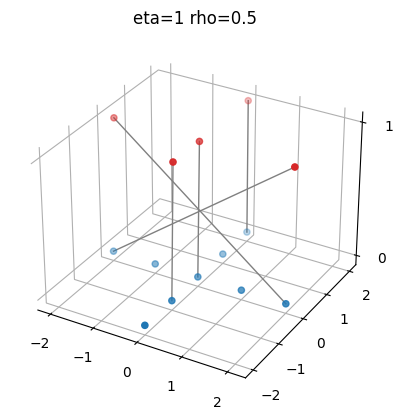

In [7]:
def plot_mapping(P,X_1,X_2, thresh=None, linewidth=1):

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    
    ax.scatter3D(X_1[:,0], X_1[:,1], 0, c='tab:blue')
    ax.scatter3D(X_2[:,0], X_2[:,1], 1, c='tab:red')
    ax.set_title('eta=1 rho=0.5')
    
    for i in range(P.shape[1]):
        if P[:,i].sum() < thresh: continue
        j = np.argmax(P[:,i])
        ax.plot3D([X_1[j,0], X_2[i,0]],[X_1[j,1], X_2[i,1]],[0,1],c='gray', linewidth=linewidth)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.set_zticks([0, 1])


plot_mapping(P, mesh1, mesh2, thresh=0.00000001)
#plt.savefig('croos_matching.png')

In [8]:
#another test

In [9]:
mvc_exp_params = {'n_exp': 2, 'value': 0.5, 'penalty': 10, 'niter_sOT': 10000, 'threshold_min': 0.0001, 'threshold_max': 0.5000, 'save_path': '', 'save_results': False}
Q = sgw.supervised_gromov_wasserstein(C1, C2,nitermax=20,threshold=0.5,verbose=True, mvc_exp_params=mvc_exp_params)

0 40 0.5555555555555424 0.20856930015081673
1 40 0.5555555555555424 0.3601902142717348
{(3, 4), (4, 3), (3, 1), (5, 1), (9, 2), (9, 5), (8, 3), (2, 2), (2, 5), (1, 3), (7, 4), (6, 2), (7, 1), (6, 5), (4, 2), (4, 5), (3, 3), (5, 3), (8, 2), (9, 1), (9, 4), (2, 4), (1, 2), (2, 1), (1, 5), (6, 1), (6, 4), (7, 3), (4, 1), (3, 5), (5, 2), (4, 4), (5, 5), (8, 4), (9, 3), (8, 1), (1, 4), (7, 2), (7, 5), (6, 3)}


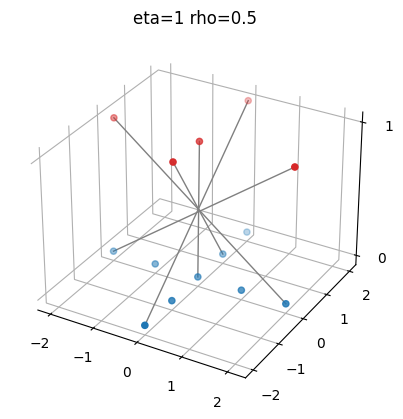

In [10]:
def plot_mapping(P,X_1,X_2, thresh=None, linewidth=1):

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    
    ax.scatter3D(X_1[:,0], X_1[:,1], 0, c='tab:blue')
    ax.scatter3D(X_2[:,0], X_2[:,1], 1, c='tab:red')
    ax.set_title('eta=1 rho=0.5')
    
    for i in range(P.shape[1]):
        if P[:,i].sum() < thresh: continue
        j = np.argmax(P[:,i])
        ax.plot3D([X_1[j,0], X_2[i,0]],[X_1[j,1], X_2[i,1]],[0,1],c='gray', linewidth=linewidth)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.set_zticks([0, 1])


plot_mapping(Q, mesh1, mesh2, thresh=0.00000001)
#plt.savefig('croos_matching.png')